In [1]:
import sqlite3
import pandas as pd

# Connect to in-memory SQLite DB
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create Tables
cursor.execute('''
CREATE TABLE Users (
    UserID INTEGER PRIMARY KEY,
    Name TEXT,
    Age INTEGER,
    Occupation TEXT
);
''')

cursor.execute('''
CREATE TABLE Emotion (
    EmotionID INTEGER PRIMARY KEY,
    EmotionName TEXT
);
''')

cursor.execute('''
CREATE TABLE JournalEntry (
    EntryID INTEGER PRIMARY KEY,
    UserID INTEGER,
    EmotionID INTEGER,
    DateTime TEXT,
    Text TEXT,
    Intensity INTEGER,
    FOREIGN KEY(UserID) REFERENCES Users(UserID),
    FOREIGN KEY(EmotionID) REFERENCES Emotion(EmotionID)
);
''')

cursor.execute('''
CREATE TABLE Triggers (
    TriggerID INTEGER PRIMARY KEY,
    EntryID INTEGER,
    TriggerType TEXT,
    Notes TEXT,
    FOREIGN KEY(EntryID) REFERENCES JournalEntry(EntryID)
);
''')

# Insert Sample Data
cursor.execute("INSERT INTO Users VALUES (1, 'Rhichaa', 21, 'Student')")
cursor.execute("INSERT INTO Emotion VALUES (1, 'Happy')")
cursor.execute("INSERT INTO JournalEntry VALUES (1, 1, 1, '2025-05-23 20:15', 'Felt good after finishing a project', 8)")
cursor.execute("INSERT INTO Triggers VALUES (1, 1, 'Academic', 'Completed a DBMS mini project')")

conn.commit()

In [2]:
# View Journal Entries
df = pd.read_sql_query("SELECT * FROM JournalEntry", conn)
df

,EntryID,UserID,EmotionID,DateTime,Text,Intensity
0,1,1,1,2025-05-23 20:15,Felt good after finishing a project,8


In [4]:
# View all users
pd.read_sql_query("SELECT * FROM Users", conn)

,UserID,Name,Age,Occupation
0,1,Rhichaa,21,Student


In [5]:
# View all emotions
pd.read_sql_query("SELECT * FROM Emotion", conn)

,EmotionID,EmotionName
0,1,Happy


In [6]:
# View all journal entries
pd.read_sql_query("SELECT * FROM JournalEntry", conn)

,EntryID,UserID,EmotionID,DateTime,Text,Intensity
0,1,1,1,2025-05-23 20:15,Felt good after finishing a project,8


In [7]:
# View all triggers
pd.read_sql_query("SELECT * FROM Triggers", conn)

,TriggerID,EntryID,TriggerType,Notes
0,1,1,Academic,Completed a DBMS mini project


In [8]:
# Report: Join JournalEntry with User and Emotion
report_query = """
SELECT
    Users.Name AS User,
    JournalEntry.DateTime,
    Emotion.EmotionName,
    JournalEntry.Text,
    JournalEntry.Intensity
FROM JournalEntry
JOIN Users ON JournalEntry.UserID = Users.UserID
JOIN Emotion ON JournalEntry.EmotionID = Emotion.EmotionID
"""

pd.read_sql_query(report_query, conn)

,User,DateTime,EmotionName,Text,Intensity
0,Rhichaa,2025-05-23 20:15,Happy,Felt good after finishing a project,8


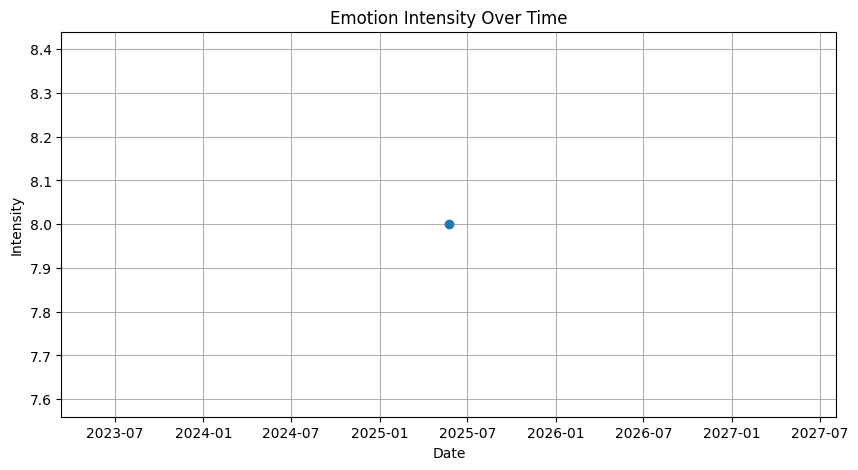

In [10]:
import matplotlib.pyplot as plt

# Load data
df = pd.read_sql_query(report_query, conn)

# Convert DateTime to pandas datetime object
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Plot
plt.figure(figsize=(10,5))
plt.plot(df['DateTime'], df['Intensity'], marker='o', linestyle='-')
plt.title('Emotion Intensity Over Time')
plt.xlabel('Date')
plt.ylabel('Intensity')
plt.grid(True)
plt.show()

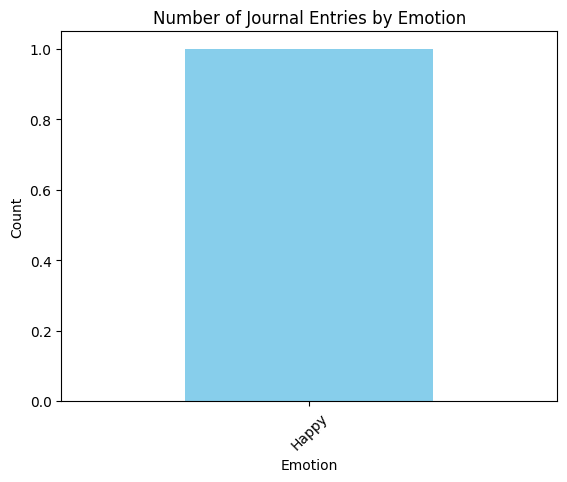

In [11]:

emotion_counts = df['EmotionName'].value_counts()
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Journal Entries by Emotion')
plt.ylabel('Count')
plt.xlabel('Emotion')
plt.xticks(rotation=45)
plt.show()

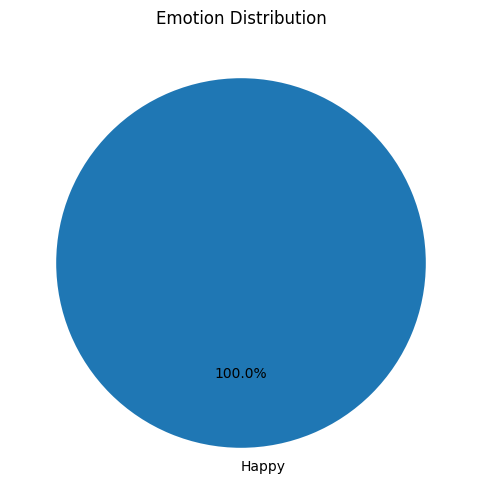

In [12]:
emotion_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), startangle=90)
plt.title('Emotion Distribution')
plt.ylabel('')
plt.show()

In [13]:
conn2 = sqlite3.connect("emotion_journal.db")  # Create new physical DB file
df.to_sql("JournalView", conn2, if_exists="replace", index=False)
conn2.close()

In [14]:
from google.colab import files
files.download("emotion_journal.db")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>